# 8
A small reaction bomb fitted with a sensitive pressure-measuring device is flushed out and filled with a mixture at 76,94% reactant A and 23,06% inert at 1 atm pressure and 14°C, a temperature low enough that the reaction does not proceed to any appreciable extent.

|Time, min|Total pressure, atm.|
|---|---|
|0.5|1.5|
|1|1.65|
|1.5|1.76|
|2|1.84|
|2.5|1.90|
|3|1.95|
|3.5|1.99|
|4|2.025|
|5|2.08|
|6|2.12|
|7|2.15|
|8|2.175|

The temperature is raised rapidly to 100°C, and the readings in the table are obtained. The stoicheometry of the reaction is 
$$A \to 2R$$ and after sufficient time the reaction proceeds to completion. Find a rate equation in units of moles, liters and minutes which will satisfactorily fit the data. [$k_1= 2.5 units?$]

In [41]:
import numpy
from numpy import log, array, exp, linspace
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline


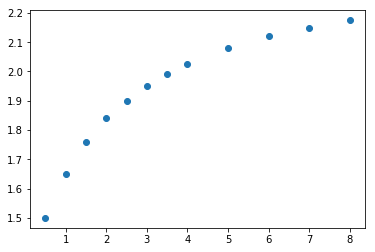

In [50]:
from numpy import array
from matplotlib import pyplot as plt
%matplotlib inline
Data = array([[0.5,1.5],
                 [1.0,1.65],
                 [1.5,1.76],
                 [2.0,1.84],
                 [2.5,1.90],
                 [3.0,1.95],
                 [3.5,1.99],
                 [4.0,2.025],
                 [5.0,2.08],
                 [6.0,2.12],
                 [7.0,2.15],
                 [8.0,2.175]])
te = Data[:, 0]
Pe = Data[:, 1]
plt.plot(te, Pe, 'o')

How to solve this???

Hints:
1. Remember the ideal gas law
2. Remember the mole balance
3. Remember the pressure at time 0 is important
4. Remember to make a link between the pressure in the reactor and the reaction rate... compare apples with apples

## My solution

Note: This is not the only solution, this just happens to be a solution that I was able to come up with

From the data it is clear that we require the initial conditions for the reactor at time 0 in order to determine solve the differential equation which is inherently part of the batch reactor mole balance:

$$ \frac{dNA}{dt} = r_AV $$

Ideal gas law:

$$ PV=NRT$$

In this case we assume the reactor to be a rigid structure with constant volume which would result in an increased pressure as the reaction proceeds to completion. 

This means the known parameters are:

|Parameter|$t_{o,no\:reaction}$|$t_{o, just\:before\:reaction}$|
|---|---|---|
|Temp ($^o$C)|14|100|
|$y_A$|0.7694|0.7694|
|$y_I$|0.2306|0.2306|
|$P_{tot}$ (atm)|1|?|

Considering no change in volume we can convert the ideal gas law by cancelling constant terms:

$$ \frac{P_2V_2=N_2RT_2}{P_1V_1=N_1RT_1} $$

reduces to:

$$ \frac{P_2}{P_1}=\frac{T2}{T1} $$

$$ P_2 =P_1\frac{T_2}{T_1}$$

In [51]:
P1 = 1 #atm

Ptoto = P1*(100+273.15)/(14+273.15)

print('Ptoto=', Ptoto, 'atm')

Ptoto= 1.2994950374368797 atm


The basic mole balance can now be used as a starting point:

$$ \frac{dN_A}{dt}=r_AV$$

Assume the reaction rate can be described by a power law function:

$$ r_A = -kC_A^n = -k\left(\frac{N_A}{V}\right)^n$$

We know from the stoichiometric equation that:
$$ A\to2R$$

therefore:

$$ r_R = -2r_A$$

***FOR EVERY ONE A, 2 R IS MADE***




The ideal gas law for the reaction would be:

$$ P_2 = P_1\frac{\sum(N_{i,2})}{\sum(N_{i,1})}=P_1\frac{N_{A,2}+N_{R,2}+N_{I,2}}{N_{A,1}+N_{R,1}+N_{I,1}} $$

This equation would provide the required output of pressure, as the reaction proceeds.

All we need is to determine the total number of moles in the reactor initially and as a function of time. This can be done by solving the $N_A(t)$, $N_R(t)$. 

So the missing bit is the total molecules at time 0. Using the ideal gas law we would require the reactor volume, reactor pressure and reactor temperature. Of these we know the pressure and temperature, which leads us to the question of whether this actually matters?

If we use the molecular density $\left(\frac{N_{tot}}{V}\right)$ we can avoid the unknown volume. We could also choose a basis for either the initial molecules or the volume. 

In this case I will decide on a volume of 1 L...I will show below what the answer would be if I choose 1 mol $N_{tot}$

For V = 1L:

Ptoto= 1.2994950374368797 atm


In [45]:
P = Ptoto*101.325 #kPa
V = 1 #L
R = 8.314 #kPa.L/mol.K
T = 100+273.15 #K

Ntoto = P*V/(R*T)

print('Ntoto=', Ntoto, 'mol')

Ntoto= 0.042442188670681336 mol


This means that the initial $N_{Ao}$ and $N_I$ were

In [46]:
NAo = 0.7694*Ntoto
NI = 0.2306*Ntoto
NRo = 0

print('NAo =', NAo, 'mol,', 'NI =', NI, 'mol,', 'NRo =', NRo, 'mol,')

NAo = 0.03265501996322222 mol, NI = 0.009787168707459116 mol, NRo = 0 mol,


Remember the rate expression:
$$ r_A = -kC_A^n = -k\left(\frac{N_A}{V}\right)^n$$

Define the differential equations:

$$\frac{dN_A}{dt} = r_AV$$
$$\frac{dN_R}{dt} = -2r_AV$$


In [47]:
def ri(NA):
    return -k*(NA/V)**n

def diffs(var, t): #remember to describe the dependent variable and then the independent variable   
    NA = var[0]
    NR = var[1]
    rA = ri(NA)
    rR = -2*rA
    dNAdt = rA*V
    dNRdt = rR*V
    return [dNAdt, dNRdt]

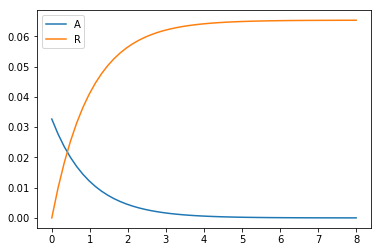

In [48]:
from scipy.integrate import odeint
from numpy import linspace

def sol(k, n):
    tspan = linspace(0, 8)
    var = odeint(diffs, [NAo, NRo], tspan)
    return var 

k = 1
n = 1
tspan = linspace (0, 8)

var = sol(k, n)
NA = var[:, 0]
NR = var[:, 1]

plt.plot(tspan, var)
plt.legend(['A', 'R'])

Now that we have the $N_A$ and $N_R$ amounts, we can calculate the pressure in the system:

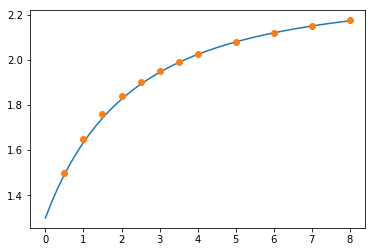

In [52]:
k = 2.5 #
n = 1.5 #

var = sol(k, n)
NA = var[:, 0]
NR = var[:, 1]

Ptot = Ptoto*(NA+NR+NI)/(Ntoto)
plt.plot(tspan, Ptot, '-', te, Pe, 'o')

## What if we differentiated the ideal gas law with time??? Solve P(t)...

$$ PV = NRT $$

$$ \frac{dP}{dt}=\frac{RT}{V}\frac{dN_{tot}}{dt}$$

$$=\frac{RT}{V}\left[\frac{dN_A}{dt}+\frac{dN_R}{dt}\right]$$

$$=\frac{RT}{V}(r_AV-2r_AV)$$

$$\frac{dP}{dt}=RT(-r_A) $$

This means we can solve P as a function of $N_A$, which means we can add this as just another variable in the differential equation function:

In [53]:
def ri(NA):
    return -k*(NA/V)**n

def diffs(var, t): #remember to describe the dependent variable and then the independent variable
    NA = var[0]
    NR = var[1]
    P = var[2]
    rA = ri(NA)
    rR = -2*rA
    dNAdt = rA*V
    dNRdt = rR*V
    dPdt = R*T*-rA
    return [dNAdt, dNRdt, dPdt]

We still need to choose a base for our system, which I will choose as $N_{tot,o}$=1 mol

In [54]:
P = Ptoto*101.325 #kPa
Ntoto = 1 #mol
R = 8.314 #kPa.L/mol.K
T = 100+273.15 #K

V = Ntoto*R*T/(P)

print('V=', V, 'L')

V= 23.561461633358004 L


This means that the initial $N_{Ao}$ and $N_I$ were

In [55]:
NAo = 0.7694*Ntoto
NI = 0.2306*Ntoto
NRo = 0

print('NAo =', NAo, 'mol,', 'NI =', NI, 'mol,', 'NRo =', NRo, 'mol,')

NAo = 0.7694 mol, NI = 0.2306 mol, NRo = 0 mol,


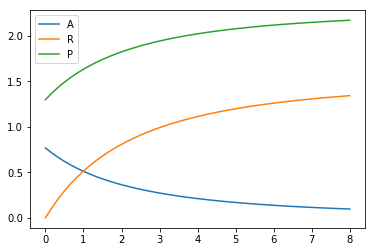

In [56]:
from scipy.integrate import odeint
from numpy import linspace

def sol(k, n):
    tspan = linspace(0, 8)
    var = odeint(diffs, [NAo, NRo, Ptoto*101.325], tspan)
    return var 

var = sol(1, 1)
NA = var[:, 0]
NR = var[:, 1]
P = var[:, 2]

plt.plot(tspan, NA, tspan, NR, tspan, P/101.325)
plt.legend(['A', 'R', 'P'])

Now that we have the $N_A$ and $N_R$ amounts, we can calculate the pressure in the system:

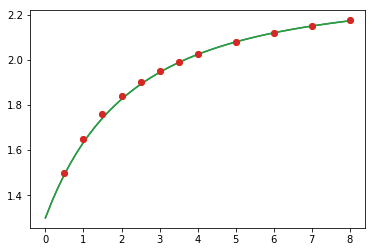

In [59]:
k = 2.5 #
n = 1.5 #

var = sol(k, n)
NA = var[:, 0]
NR = var[:, 1]

Ptot = Ptoto*(NA+NR+NI)/(Ntoto)
plt.plot(tspan, Ptot, '-', te, Pe, 'o')
k = 2.5 #
n = 1.5 #

var = sol(k, n)
NA = var[:, 0]
NR = var[:, 1]

Ptot = Ptoto*(NA+NR+NI)/(Ntoto)
plt.plot(tspan, Ptot, '-', te, Pe, 'o')

## Now let's look at a choice of $N_{tot,o}$ = 1 mol

In [60]:
P = Ptoto*101.325 #kPa
Ntoto = 1 #mol
R = 8.314 #kPa.L/mol.K
T = 100+273.15 #K

V = Ntoto*R*T/(P)

print('V=', V, 'mol')

V= 23.561461633358004 mol


This means that the initial NAo and NI were

In [61]:
NAo = 0.7694*Ntoto
NI = 0.2306*Ntoto
NRo = 0

print('NAo =', NAo, 'mol,', 'NI =', NI, 'mol,', 'NRo =', NRo, 'mol,')

NAo = 0.7694 mol, NI = 0.2306 mol, NRo = 0 mol,


In [62]:
def ri(NA):
    return -k*(NA/V)**n

def diffs(var, t): #remember to describe the dependent variable and then the independent variable
    NA = var[0]
    NR = var[1]
    rA = ri(NA)
    rR = -2*rA
    dNAdt = rA*V
    dNRdt = rR*V
    return [dNAdt, dNRdt]

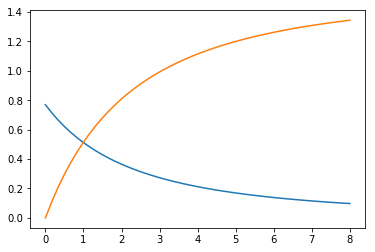

In [63]:
from scipy.integrate import odeint
from numpy import linspace

def sol(k, n):
    tspan = linspace(0, 8)
    var = odeint(diffs, [NAo, NRo], tspan)
    return var 

var = sol(1, 1)
NA = var[:, 0]
NR = var[:, 1]
plt.plot(tspan, var)

Now that we have the NANA and NRNR amounts, we can calculate the pressure in the system:


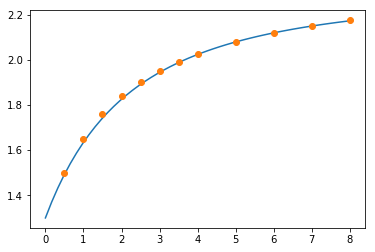

In [64]:
k = 2.5 #
n = 1.5 #

var = sol(k, n)
NA = var[:, 0]
NR = var[:, 1]

Ptot = Ptoto*(NA+NR+NI)/(Ntoto)
plt.plot(tspan, Ptot, '-', te, Pe, 'o')